# FRESCO RETAIL
#### Problem description: 
- The data analyses Fresco Retail’s customers’ transaction data to predict return decision using
  various data points like customer background, payment modes, store types, product nature, etc. 
#### Objective: 
- To study the influence of different transaction data points and their impact on a customer’s final decision to return the
  product(s) bought in a transaction.

In [1]:
# import the library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the dataset and lets look first five rows

In [2]:
df= pd.read_excel('Fresco_LargeRetailer.xlsx',sheet_name= 'Transaction_Data')
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,8,True,1985-12-31,M,0,4,3
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,2,True,1985-12-31,M,1,3,2
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,...,1.0,14356,104013.0,5,True,1985-12-31,M,1,1,2
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,...,4.0,12776,92580.0,8,True,1985-12-31,M,1,5,3
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,...,1.0,1101,101763.0,3,True,1985-12-31,M,0,1,3


### Approach:
- Understand the data variables properly.
- Clean the data
- Conduct EDA (Exploratory Data Analysis) on the cleaned Data
- Uni-variate and Bi-variate Analysis
- Feature Engineering
- Identify the most important variables (or data parameters) that affect the final decision
- Develop and Validate Samples
- Model Building
- Improving model accuracy
- Model Comparison
- Prediction

In [3]:

df['Month_code'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
           10:"October",11:"November",12:"December"},inplace=True)

df['prod_cat_code'].replace({1:"Bags",2:"Books",3:"Clothing",4:'Electronics',5:'Footwear',6:'Home and kitchen'},inplace=True)

df['prod_subcat_code'].replace({1:'Bath',2:'Academic',3:'Women',4:'Mens',5:'Tools',6:'Fiction',7:'DIY',8:'Kitchen',9:'Non-Fiction',
                                10:'Kids',11:'Mobiles',12:'Audio and video',13:'Comics',14:'Computers',15:'Furnishing',
                                16:'Children',17:'Personal Appliances',18:'Cameras'}, inplace=True)

df['Education_code'].replace({1:'Basic',2:'Graduation',3:'Master',4:'PhD',5:'Others'}, inplace=True)

df['Profession_Code'].replace({1:'Self Employed',2:'Salaried',3:'Others'},inplace=True)

df['city_code'].replace({1:'Mumbai',2:'Bangalore',3:'New Delhi',4:'Gurgaon',5:'Kolkata',6:'Chennai',
                         7:'Pune',8:'Hyderabad',9:'Vishakhapatnam',10:'Ahmedabad'}, inplace=True)

df['Return'].replace({True:'Yes',False: 'No'}, inplace= True)

In [4]:
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,Hyderabad,Yes,1985-12-31,M,0,PhD,Others
1,49441287,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,Bangalore,Yes,1985-12-31,M,1,Master,Salaried
2,426787191,January,Home and kitchen,Bath,4,1327,6635,696.675,NaN,Debit Card,...,1.0,14356,104013.0,Kolkata,Yes,1985-12-31,M,1,Basic,Salaried
3,525041466,January,Footwear,Mens,5,1325,6625,695.625,NaN,Debit Card,...,4.0,12776,92580.0,Hyderabad,Yes,1985-12-31,M,1,Others,Others
4,1167308476,January,Clothing,Women,3,1237,6185,649.425,NaN,Debit Card,...,1.0,1101,101763.0,New Delhi,Yes,1985-12-31,M,0,Basic,Others


In [5]:
# Filling NaN with zero, it means there is no charge of delivery
df['Delivery_chrgs']= df['Delivery_chrgs'].fillna(0)
df.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,Hyderabad,Yes,1985-12-31,M,0,PhD,Others
1,49441287,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,Bangalore,Yes,1985-12-31,M,1,Master,Salaried
2,426787191,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,...,1.0,14356,104013.0,Kolkata,Yes,1985-12-31,M,1,Basic,Salaried
3,525041466,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,...,4.0,12776,92580.0,Hyderabad,Yes,1985-12-31,M,1,Others,Others
4,1167308476,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,...,1.0,1101,101763.0,New Delhi,Yes,1985-12-31,M,0,Basic,Others


In [6]:
# Lets check for summary of data
df.describe()

,transaction_id,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,CustID,Income,Marital_status
count,1.959700e+04,19597.000000,19597.000000,19597.00000,19597.000000,19597.000000,19546.000000,19597.000000,19554.000000,19597.00000
mean,5.304610e+10,3.098178,777.154718,2302.11563,241.722141,65.102312,3.882329,9799.000000,70539.063977,0.52901
std,2.724848e+10,1.445638,414.308709,1742.62635,182.975767,81.027200,1.414998,5657.310948,37428.491760,0.49917
min,4.145331e+07,1.000000,70.000000,70.00000,7.350000,0.000000,1.000000,1.000000,7157.000000,0.00000
25%,2.943273e+10,2.000000,418.000000,915.00000,96.075000,0.000000,3.000000,4900.000000,37962.000000,0.00000
50%,5.332340e+10,3.000000,775.000000,1826.00000,191.730000,50.000000,4.000000,9799.000000,69316.000000,1.00000
75%,7.684265e+10,4.000000,1136.000000,3348.00000,351.540000,90.000000,5.000000,14698.000000,99548.000000,1.00000
max,9.998755e+10,5.000000,1500.000000,7500.00000,787.500000,250.000000,5.000000,19597.000000,159984.000000,1.00000


**By looking at summary of table we conclude that**
- The rate of the product ranging from Rs 70 to Rs 1500 which quite okay, There is not such expensive items  
- The Maximum delivery charges is Rs 250 and average charge is Rs 65
- The average prodcuts review is 3.8 which is quite good
- We could say that most of customers  quantity of bought product is on average 3.


In [7]:
# Lets look at the datatype 
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19597 entries, 0 to 19596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19597 non-null  int64         
 1   Month_code        19597 non-null  object        
 2   prod_cat_code     19597 non-null  object        
 3   prod_subcat_code  19597 non-null  object        
 4   Qty               19597 non-null  int64         
 5   Rate              19597 non-null  int64         
 6   Amount            19597 non-null  int64         
 7   Tax               19597 non-null  float64       
 8   Delivery_chrgs    19597 non-null  float64       
 9   Payment_mode      19597 non-null  object        
 10  Store_type        19597 non-null  object        
 11  Reviews           19546 non-null  float64       
 12  CustID            19597 non-null  int64         
 13  Income            19554 non-null  float64       
 14  city_code         1959

#### Dropping the useless columns
- The transaction id, customer id, and DOB would not help us to build the model so, we will drop it

In [8]:
df.drop(['transaction_id','CustID','DOB'], inplace=True,axis=1)

In [9]:
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,Income,city_code,Return,Gender,Marital_status,Education_code,Profession_Code
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,67501.0,Hyderabad,Yes,M,0,PhD,Others
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,102738.0,Bangalore,Yes,M,1,Master,Salaried
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,1.0,104013.0,Kolkata,Yes,M,1,Basic,Salaried
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,4.0,92580.0,Hyderabad,Yes,M,1,Others,Others
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,1.0,101763.0,New Delhi,Yes,M,0,Basic,Others


In [10]:
# Lets check for missing values 
df.isnull().sum()

Month_code           0
prod_cat_code        0
prod_subcat_code     0
Qty                  0
Rate                 0
Amount               0
Tax                  0
Delivery_chrgs       0
Payment_mode         0
Store_type           0
Reviews             51
Income              43
city_code            0
Return               0
Gender               0
Marital_status       0
Education_code       0
Profession_Code      0
dtype: int64

In [11]:
# lets check the shape 
df.shape

(19597, 18)

In [12]:
# Since our data are around 20,000 and we can drop NaN values, it wont affect the data, which less than 0.01%
df.dropna(inplace=True)

In [13]:
df.shape

(19504, 18)

#### EDA (Exploratory Data Analysis)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Return', ylabel='count'>

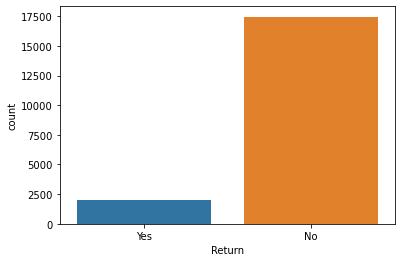

In [14]:
sns.countplot(df['Return'])

**So its seems like Most of the products would'nt returend, which is quite good for the FRESCO Retail. But Here data is imbalace we have to balanced it beofre going to build the model, otherwise our model will be baised toward maxmimum data points.**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month_code', ylabel='count'>

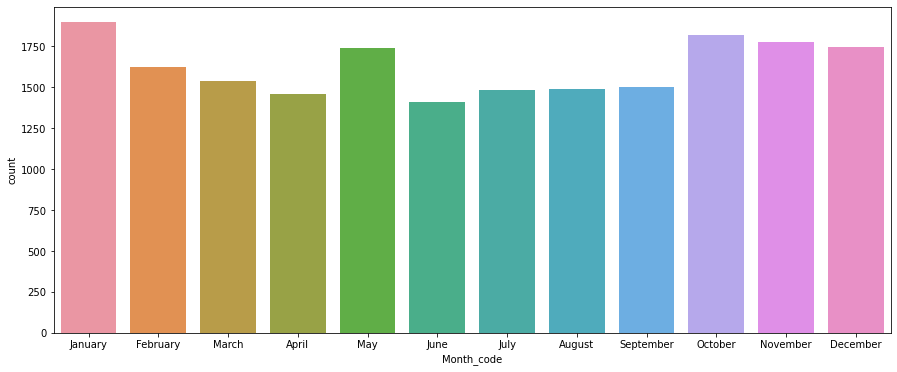

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(df['Month_code'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat_code', ylabel='count'>

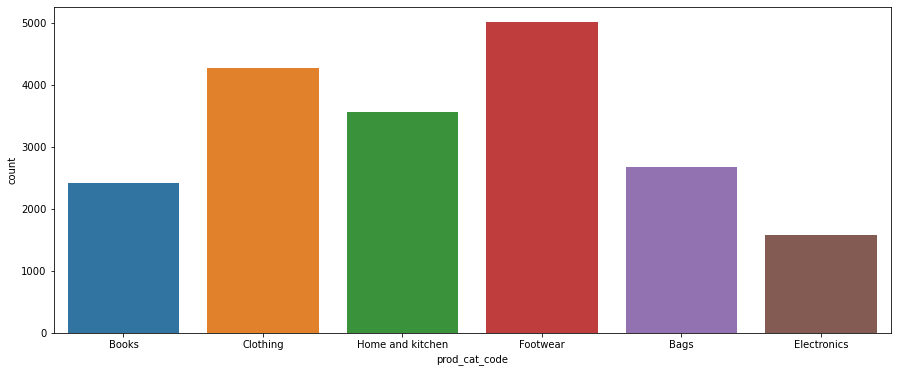

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df['prod_cat_code'])

**By looking at graph we could say that maximum returns are from these two category footwear and clothing, or we could customers more likely to buy these product footwear, clothing and kitchen & home** 

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_subcat_code', ylabel='count'>

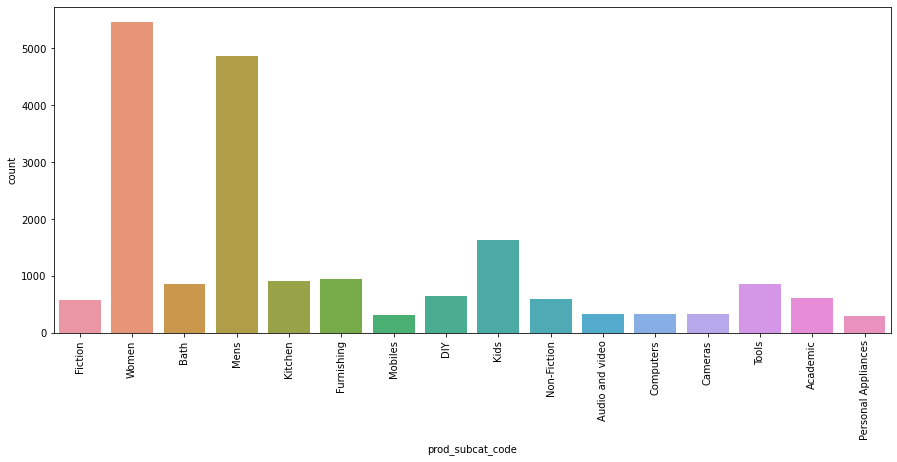

In [17]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df['prod_subcat_code'],orient= 'horizontal')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Qty', ylabel='count'>

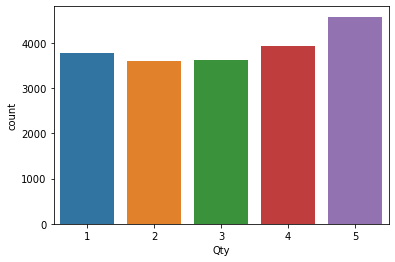

In [18]:

sns.countplot(df['Qty'])

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rate'>

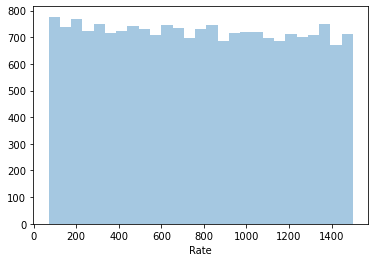

In [19]:
sns.distplot(df['Rate'],kde=False)

<AxesSubplot:xlabel='Tax'>

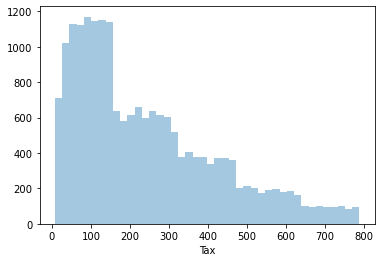

In [20]:
sns.distplot(df['Tax'],kde=False)

**Maximum Tax of the product is between 0 to 300**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment_mode', ylabel='count'>

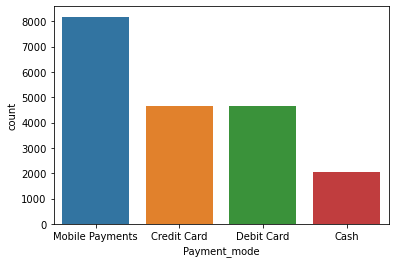

In [21]:
sns.countplot(df['Payment_mode'])

**The maximum transaction is done trhough mobile payments and credict and debi card**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

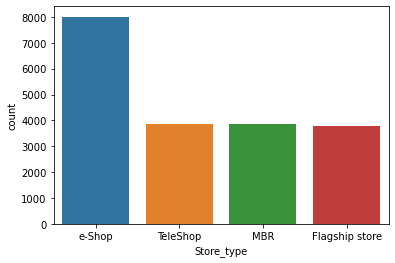

In [22]:
sns.countplot(df['Store_type'])

**The Maximum no.of product was bought online**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews', ylabel='count'>

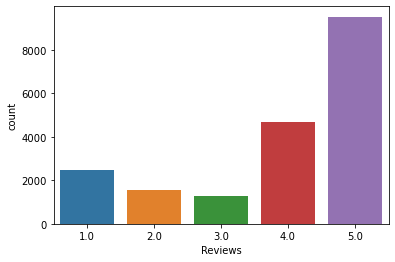

In [23]:
sns.countplot(df['Reviews'])

**Customers are higly statisfied with the products**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_code', ylabel='count'>

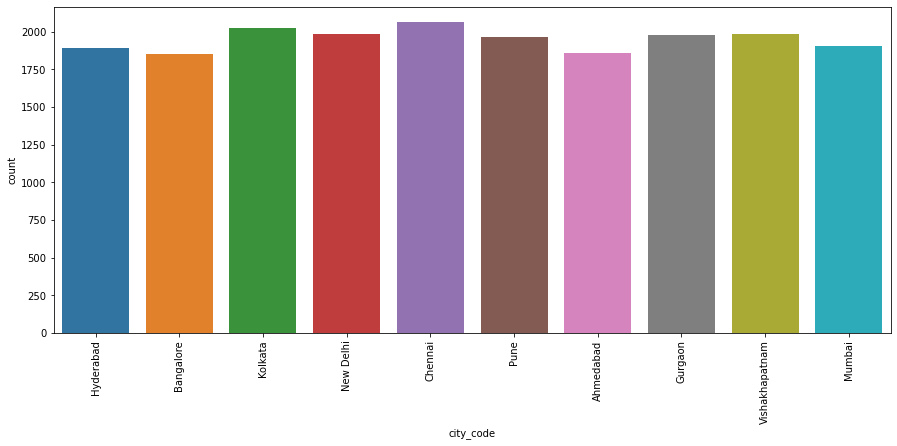

In [24]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df.city_code)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession_Code', ylabel='count'>

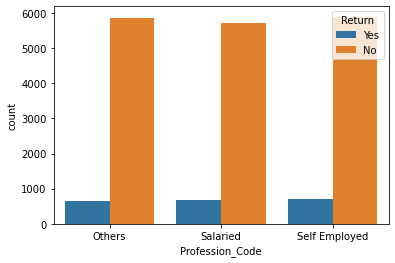

In [25]:

sns.countplot(df.Profession_Code,hue=df.Return)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month_code', ylabel='count'>

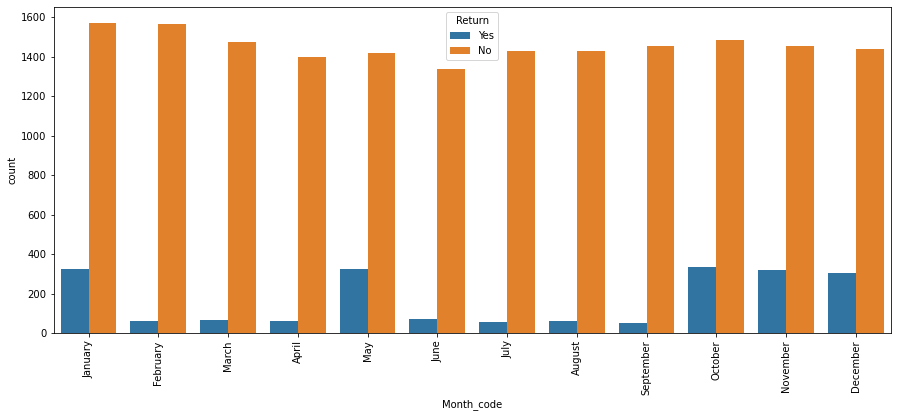

In [26]:
# Lets do Bi-variate analysis
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(df.Month_code,hue=df.Return)

**In Months of January,may, October,and November are maximumn returns products**

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews', ylabel='count'>

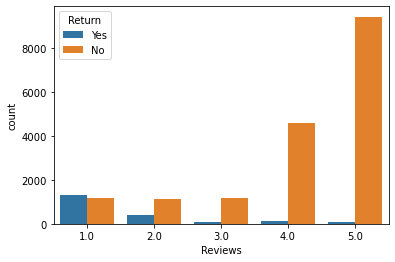

In [27]:
sns.countplot(df['Reviews'],hue=df.Return)

**Almost all product of rating 1 was returned** 

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

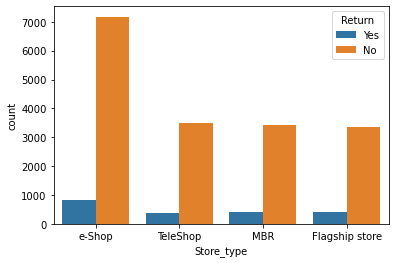

In [28]:
sns.countplot(df['Store_type'],hue=df.Return)

<AxesSubplot:xlabel='Rate', ylabel='Return'>

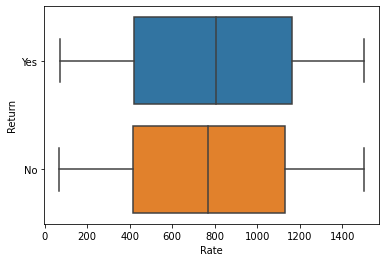

In [29]:
sns.boxplot(x='Rate',y='Return',data=df)

<AxesSubplot:xlabel='Tax', ylabel='Return'>

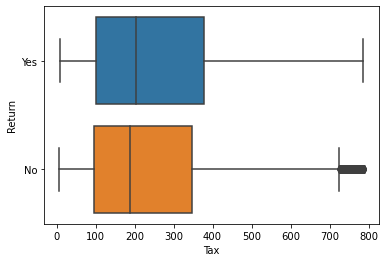

In [30]:
sns.boxplot(x='Tax',y='Return',data=df)

<AxesSubplot:xlabel='Amount', ylabel='Return'>

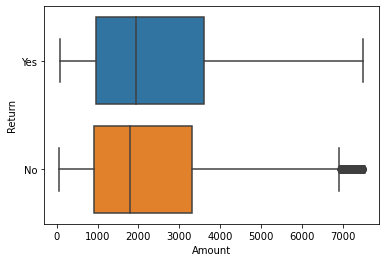

In [31]:
sns.boxplot(x='Amount',y='Return',data=df)

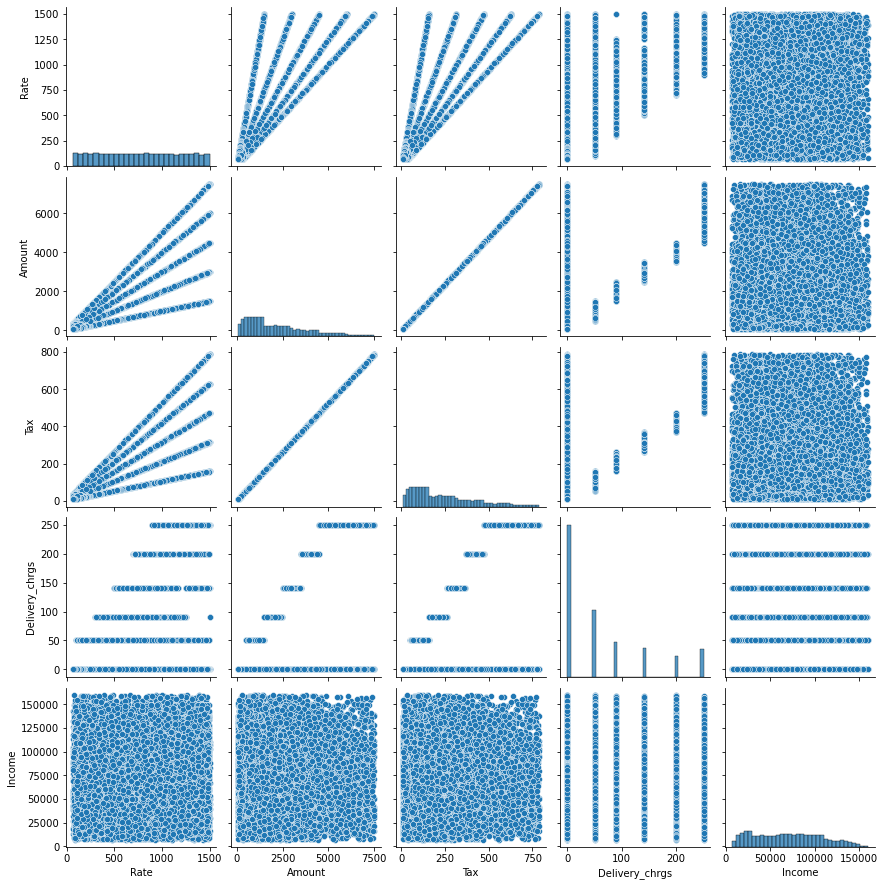

In [32]:
# for the numerical features we plot pairs plot see the how the data points are located
sns.pairplot(df[['Rate','Amount','Tax','Delivery_chrgs','Income']])

### Handling categorical variables
One can find many ways to handle categorical data. Some of them categorical data are,

- **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
- **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19504 entries, 0 to 19596
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month_code        19504 non-null  object 
 1   prod_cat_code     19504 non-null  object 
 2   prod_subcat_code  19504 non-null  object 
 3   Qty               19504 non-null  int64  
 4   Rate              19504 non-null  int64  
 5   Amount            19504 non-null  int64  
 6   Tax               19504 non-null  float64
 7   Delivery_chrgs    19504 non-null  float64
 8   Payment_mode      19504 non-null  object 
 9   Store_type        19504 non-null  object 
 10  Reviews           19504 non-null  float64
 11  Income            19504 non-null  float64
 12  city_code         19504 non-null  object 
 13  Return            19504 non-null  object 
 14  Gender            19504 non-null  object 
 15  Marital_status    19504 non-null  int64  
 16  Education_code    19504 non-null  object

In [34]:
df['Qty']=df['Qty'].astype('str')
df['Marital_status']= df['Marital_status'].astype('str')
df['Reviews']= df['Reviews'].astype('str')


In [35]:
Months = pd.get_dummies(df['Month_code'],drop_first=True)
Months.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
product_cat= pd.get_dummies(df['prod_cat_code'],drop_first=True)
product_cat.head()

,Books,Clothing,Electronics,Footwear,Home and kitchen
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,1,0,0,0


In [37]:
product_subcat= pd.get_dummies(df['prod_subcat_code'],drop_first=True)
product_subcat.head()

,Audio and video,Bath,Cameras,Computers,DIY,Fiction,Furnishing,Kids,Kitchen,Mens,Mobiles,Non-Fiction,Personal Appliances,Tools,Women
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
qty= pd.get_dummies(df['Qty'],drop_first=True)
qty.head()

,2,3,4,5
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [39]:
payment_mode= pd.get_dummies(df['Payment_mode'],drop_first=True)
payment_mode.head()

,Credit Card,Debit Card,Mobile Payments
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [40]:
store_type= pd.get_dummies(df['Store_type'],drop_first=True)
store_type.head()

,MBR,TeleShop,e-Shop
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
City_code=  pd.get_dummies(df['city_code'],drop_first=True)
City_code.head()

,Bangalore,Chennai,Gurgaon,Hyderabad,Kolkata,Mumbai,New Delhi,Pune,Vishakhapatnam
0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [42]:
gender=  pd.get_dummies(df['Gender'],drop_first=True)
gender.head()

,M
0,1
1,1
2,1
3,1
4,1


In [43]:
df.Education_code.value_counts()

Others        4111
Graduation    3993
Master        3920
Basic         3885
PhD           3595
Name: Education_code, dtype: int64

In [44]:
df['Education_code'].replace({'Others':0,'Basic':1 ,'Graduation':2, 'Master':3,'PhD':4}, inplace=True)
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,Income,city_code,Return,Gender,Marital_status,Education_code,Profession_Code
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,67501.0,Hyderabad,Yes,M,0,4,Others
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,102738.0,Bangalore,Yes,M,1,3,Salaried
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,1.0,104013.0,Kolkata,Yes,M,1,1,Salaried
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,4.0,92580.0,Hyderabad,Yes,M,1,0,Others
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,1.0,101763.0,New Delhi,Yes,M,0,1,Others


In [45]:
Profession= pd.get_dummies(df['Profession_Code'],drop_first=True)
Profession.head()

,Salaried,Self Employed
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [46]:
df.Reviews.value_counts()

5.0    9516
4.0    4688
1.0    2484
2.0    1537
3.0    1279
Name: Reviews, dtype: int64

In [47]:
reviews= pd.get_dummies(df['Reviews'],drop_first=True)
reviews.head()

,2.0,3.0,4.0,5.0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0


In [48]:
df= pd.concat([df,Profession,gender,City_code,store_type,payment_mode,product_subcat,qty,Months,product_cat,reviews],axis=1)
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,...,September,Books,Clothing,Electronics,Footwear,Home and kitchen,2.0,3.0,4.0,5.0
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,...,0,1,0,0,0,0,0,0,0,0
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,...,0,0,1,0,0,0,0,0,0,0
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,...,0,0,0,0,0,1,0,0,0,0
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,...,0,0,0,0,1,0,0,0,1,0
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# we have drop these varibles
df.drop(['Month_code','prod_cat_code','prod_subcat_code','Qty','Payment_mode','Store_type','city_code','Gender',
        'Education_code','Profession_Code', 'Reviews'],axis=1,inplace=True)

### Features selections
- Correlation
- chi2
- Feature importance

In [50]:
cont_col=df[['Rate','Amount','Tax','Delivery_chrgs','Income']]
corr= cont_col.corr()
corr

,Rate,Amount,Tax,Delivery_chrgs,Income
Rate,1.000000,0.695217,0.695217,0.420517,0.000127
Amount,0.695217,1.000000,1.000000,0.609654,-0.006164
Tax,0.695217,1.000000,1.000000,0.609654,-0.006164
Delivery_chrgs,0.420517,0.609654,0.609654,1.000000,0.006873
Income,0.000127,-0.006164,-0.006164,0.006873,1.000000


<AxesSubplot:>

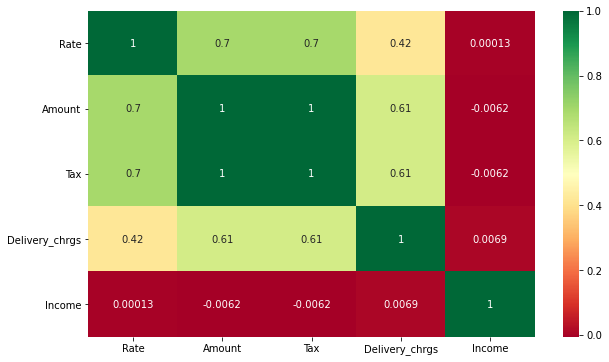

In [51]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True, cmap = "RdYlGn")

In [52]:
threshold=0.90
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
correlation(cont_col,threshold)

{'Tax'}

In [54]:
df.drop('Tax',inplace=True,axis=1)

In [55]:
df.head()

,Rate,Amount,Delivery_chrgs,Income,Return,Marital_status,Salaried,Self Employed,M,Bangalore,...,September,Books,Clothing,Electronics,Footwear,Home and kitchen,2.0,3.0,4.0,5.0
0,359,1795,90.0,67501.0,Yes,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1129,5645,250.0,102738.0,Yes,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,1327,6635,0.0,104013.0,Yes,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1325,6625,0.0,92580.0,Yes,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1237,6185,0.0,101763.0,Yes,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
X= df.drop('Return', axis=1) #independent features
y= df['Return'] #depedndent featues

In [57]:
y= y.replace({'Yes':1,'No':0})

In [58]:
X.columns

Index(['Rate', 'Amount', 'Delivery_chrgs', 'Income', 'Marital_status',
       'Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Fiction', 'Furnishing', 'Kids', 'Kitchen', 'Mens', 'Mobiles',
       'Non-Fiction', 'Personal Appliances', 'Tools', 'Women', '2', '3', '4',
       '5', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Books', 'Clothing',
       'Electronics', 'Footwear', 'Home and kitchen', '2.0', '3.0', '4.0',
       '5.0'],
      dtype='object')

In [59]:
from sklearn.feature_selection import chi2
chi_catcols= X[['Marital_status',
       'Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Fiction', 'Furnishing', 'Kids', 'Kitchen', 'Mens', 'Mobiles',
       'Non-Fiction', 'Personal Appliances', 'Tools', 'Women', '2', '3', '4',
       '5', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Books', 'Clothing',
       'Electronics', 'Footwear', 'Home and kitchen', '2.0', '3.0', '4.0',
       '5.0']]


In [60]:
#chi score
chi_scores = chi2(chi_catcols,y)

In [61]:
chi_scores

(array([2.11213507e-01, 2.22746001e-01, 5.28335092e-01, 4.98231006e-03,
        2.40903092e+00, 6.01279795e-02, 2.26469989e+00, 1.17802205e+00,
        5.71560542e-01, 6.70888979e-01, 2.34011589e+00, 3.83912789e-02,
        1.05520300e+00, 1.70381595e+00, 1.33927770e+00, 2.22642377e-01,
        8.61386973e-01, 1.77347206e+00, 2.54329395e+00, 2.24403457e+01,
        5.88165980e+00, 1.89325055e+01, 2.07026964e-01, 5.86842043e-01,
        2.27443166e+01, 3.60239380e+01, 4.78553946e+01, 2.91170289e+01,
        1.27210760e+02, 4.31011890e+00, 2.24802071e+01, 2.03783370e+00,
        8.60343559e+00, 3.57082576e+02, 2.18932843e+02, 2.24761670e+02,
        8.90389382e+01, 9.59987260e+02, 6.10691365e+01, 8.91066974e+01,
        7.87195872e+01, 8.87609086e+01, 7.15801803e+01, 4.36787607e+01,
        6.45415537e+01, 1.25009435e+02, 1.08831102e+02, 1.22462848e+02,
        7.79150745e+01, 5.40249707e+01, 5.54852890e-01, 1.62979890e+01,
        8.76386479e+00, 1.02268259e+01, 4.28345262e+02, 9.754874

In [62]:
#here first array represents chi square values and second array represnts p-values
p_values = pd.Series(chi_scores[1],index = chi_catcols.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

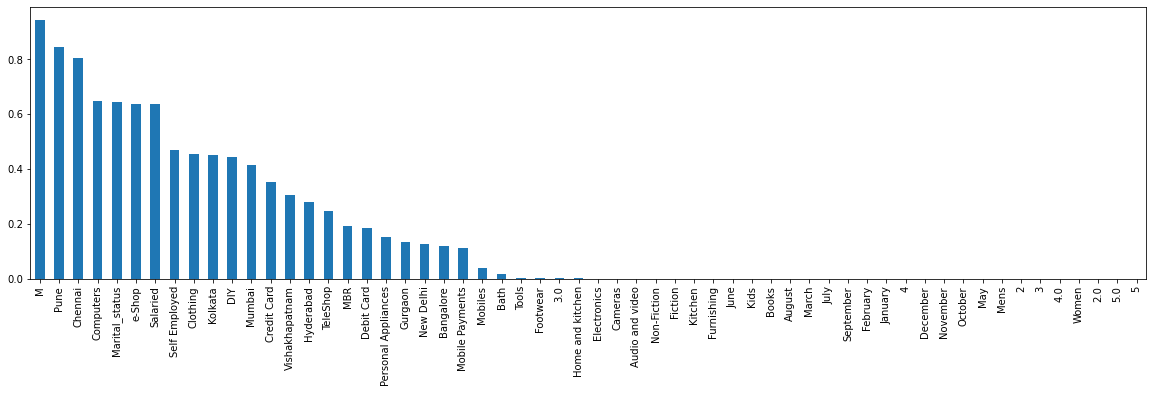

In [63]:
plt.figure(figsize=(20,5))
p_values.plot.bar()

In [64]:
# we will drop values with higher p- values which more than 0.05
X.drop(['Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Mens', 'Mobiles'],axis=1,inplace=True)

#### Feature importance

In [65]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)


ExtraTreesClassifier()

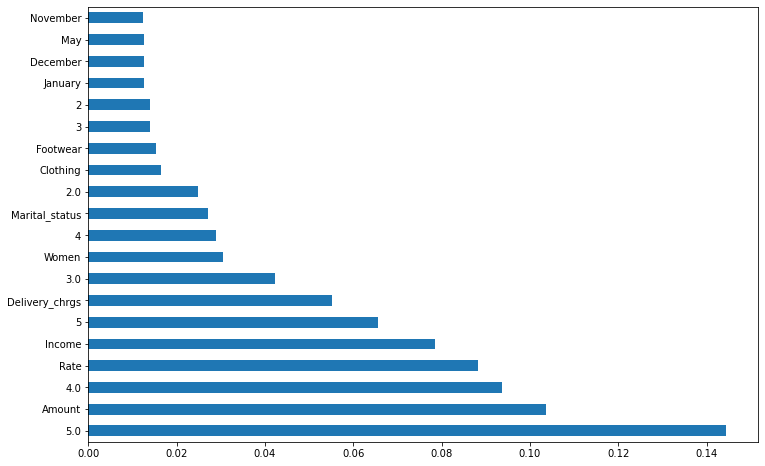

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting model using Logistic Regression
- Split dataset into train and test set in order to prediction w.r.t X_test
- Scaling is required in logistic regression
- Oversampling with smote
- Import model
- Fit the data
- Predict w.r.t X_test
- In classification we check accuracy Score
- Plot error grap
- Model comparision 


In [67]:
from sklearn.model_selection import train_test_split
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [68]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform

In [69]:
X_test_scaled=scaler.transform(X_test)

In [70]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 12221, 1: 1431})
After oversampling:  Counter({0: 12221, 1: 12221})


In [72]:
# Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [73]:
# predicting the model
y_pred=clf.predict(X_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)


[[4751  485]
 [  77  539]]
The Model accuracy is 0.9039644565960355
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5236
           1       0.53      0.88      0.66       616

    accuracy                           0.90      5852
   macro avg       0.76      0.89      0.80      5852
weighted avg       0.94      0.90      0.91      5852



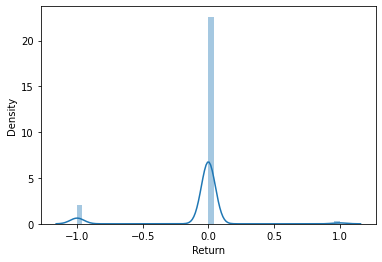

In [75]:
sns.distplot(y_test-y_pred)
plt.show()

### Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(clf,X,y,cv=10)
print(score)
np.mean(score)

[0.89492568 0.89492568 0.91235264 0.90722706 0.90102564 0.89487179
 0.89487179 0.89538462 0.90461538 0.89538462]


0.8995584907148209

### Model2: Random Forest

In [77]:
# building model by Random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [78]:
y_pred=classifier.predict(X_test_scaled)

In [79]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)


[[5085  151]
 [ 173  443]]
The Model accuracy is 0.9446343130553657
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5236
           1       0.75      0.72      0.73       616

    accuracy                           0.94      5852
   macro avg       0.86      0.85      0.85      5852
weighted avg       0.94      0.94      0.94      5852



**If we compare logistic model with random forest the accurcay and precision is quite much better than logistic model. It mean random forest model is better**.

### Hyperparameter Tuning
#### The main parameters used by a Random Forest Classifier are:
- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensemble.

#### Randomized Search Cv
In the Randomised SearchCv it will work on no of itiration.

In [80]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =1000, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,8)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 4,5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 314, 428, 542, 657, 771, 885, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 37, 64, 91, 118, 145, 172, 200], 'min_samples_split': [2, 5, 7, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'criterion': ['entropy', 'gini']}


In [81]:
#Building Randomised SearchCv model
rf_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)


In [82]:
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 37, 64, 91, 118, 145,
                                                      172, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 7, 9, 10],
                                        'n_estimators': [200, 314, 428, 542,
                                                         657, 771, 885, 1000]},
                   random_state=100, verbose=2)

In [83]:
# Finding the best parameter we should give in 
rf_randomcv.best_params_

{'n_estimators': 428,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 37,
 'criterion': 'entropy'}

**After getting the best Parameter for random forest classifier , we will now predict the model**


In [84]:
model=RandomForestClassifier(n_estimators=428,criterion='entropy',max_depth=37,
                             max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=10).fit(X_train_SMOTE,y_train_SMOTE)
predictions=model.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[5087  149]
 [ 168  448]]
0.9458304853041695
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5236
           1       0.75      0.73      0.74       616

    accuracy                           0.95      5852
   macro avg       0.86      0.85      0.85      5852
weighted avg       0.95      0.95      0.95      5852



**We conclude that that the accuracy after doing Randomized Search Cv, the model accuracy is almost same, Even without doing hyperparameter tuning our model is giving us better accurcay but the precision & recall is a bit better than our previous model after Randomized Search Cv**

In [85]:
#finding best values estimators which will go in  RandomForestClassifie()
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=37, max_features='sqrt',
                       n_estimators=428)

**This is accuracy with Randomized Search Cv**

In [86]:
#predicting the model
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score= {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[5163   73]
 [ 226  390]]
Accuracy Score= 0.9489063568010937
Classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5236
           1       0.84      0.63      0.72       616

    accuracy                           0.95      5852
   macro avg       0.90      0.81      0.85      5852
weighted avg       0.95      0.95      0.95      5852



## Statistic Model

In [87]:
# Import library
import statsmodels.api as sm

#adding constant term
x_train=sm.add_constant(X_train)
x_test=sm.add_constant(X_test)

In [88]:
model_train=sm.OLS(y_train,x_train.astype(float)).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:22:10   Log-Likelihood:                 823.16
No. Observations:               13652   AIC:                            -1570.
Df Residuals:                   13614   BIC:                            -1285.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2216      0.014     16.235      0.000       0.195       0.248
Rate                    0.0002   8.86e-06     25.178      0.000       0.000       0.000
Amount               -6.77e-05   2.67e-06    -25.388      0.000   -7.29e-05   -6.25e-05
Delivery_chrgs         -0.0001   3.07e-05     -3.622      0.000      -0.000    -5.1e-05
Income               4.807e-07   5.25e-08      9.162      0.000    3.78e-07    5.84e-07
Marital_status          0.0050      0.004      1.272      0.203      -0.003       0.013
Fiction                -0.0010      0.014     -0.072      0.942      -0.028       0.026
Furnishing              0.0366      0.013      2.818      0.005       0.011       0.062
Kids                   -0.0055      0.009     -0.633      0.527      -0.023       0.012
Kitchen                 0.0315      0.013      2.445      0.015       0.006       0.057
Non-Fiction            -0.0141      0.013     -1.049      0.294      -0.041       0.012
Personal Appliances    -0.0051      0.017     -0.294      0.769      -0.039       0.029
Tools                  -0.0117      0.013     -0.890      0.373      -0.037       0.014
Women                   0.0701      0.005     12.939      0.000       0.059       0.081
2                       0.0507      0.007      7.666      0.000       0.038       0.064
3                       0.1067      0.007     14.408      0.000       0.092       0.121
4                       0.2310      0.008     27.586      0.000       0.215       0.247
5                       0.3352      0.009     36.512      0.000       0.317       0.353
August                  0.0007      0.010      0.065      0.948      -0.019       0.020
December                0.0770      0.010      7.979      0.000       0.058       0.096
February               -0.0139      0.010     -1.413      0.158      -0.033       0.005
January                 0.0695      0.009      7.347      0.000       0.051       0.088
July                   -0.0038      0.010     -0.375      0.708      -0.023       0.016
June                   -0.0026      0.010     -0.257      0.798      -0.023       0.017
March                  -0.0022      0.010     -0.220      0.826      -0.022       0.017
May                     0.0704      0.010      7.210      0.000       0.051       0.089
November                0.0758      0.010      7.839      0.000       0.057       0.095
October                 0.0741      0.010      7.762      0.000       0.055       0.093
September              -0.0114      0.010     -1.144      0.253      -0.031       0.008
Books                  -0.0197      0.010     -2.008      0.045      -0.039      -0.000
Clothing               -0.0286      0.007     -4.257      0.000      -0.042      -0.015
Electronics            -0.0065      0.010     -0.671      0.502      -0.026       0.013
Foo

In [89]:
#adding constant term
x_train=sm.add_constant(X_train)
x_test=sm.add_constant(X_test)

In [90]:
model_train=sm.OLS(y,X.astype(float)).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Return   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.494
Method:                 Least Squares   F-statistic:                              516.5
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:22:10   Log-Likelihood:                          978.50
No. Observations:               19504   AIC:                                     -1883.
Df Residuals:                   19467   BIC:                                     -1592.
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Rate                    0.0003   6.81e-06     42.580      0.000       0.000       0.000
Amount              -8.394e-05   2.15e-06    -39.106      0.000   -8.81e-05   -7.97e-05
Delivery_chrgs      -9.467e-05   2.57e-05     -3.681      0.000      -0.000   -4.43e-05
Income               6.694e-07   4.24e-08     15.771      0.000    5.86e-07    7.53e-07
Marital_status          0.0148      0.003      4.536      0.000       0.008       0.021
Fiction                -0.0070      0.012     -0.598      0.550      -0.030       0.016
Furnishing              0.0408      0.011      3.754      0.000       0.020       0.062
Kids                    0.0021      0.007      0.285      0.775      -0.012       0.016
Kitchen                 0.0388      0.011      3.531      0.000       0.017       0.060
Non-Fiction            -0.0054      0.011     -0.467      0.640      -0.028       0.017
Personal Appliances    -0.0068      0.015     -0.458      0.647      -0.036       0.022
Tools                  -0.0062      0.011     -0.558      0.577      -0.028       0.016
Women                   0.0919      0.004     20.657      0.000       0.083       0.101
2                       0.0882      0.005     16.588      0.000       0.078       0.099
3                       0.1546      0.006     26.462      0.000       0.143       0.166
4                       0.2922      0.006     45.249      0.000       0.280       0.305
5                       0.4050      0.007     57.595      0.000       0.391       0.419
August                  0.0572      0.008      7.257      0.000       0.042       0.073
December                0.1409      0.008     18.765      0.000       0.126       0.156
February                0.0508      0.008      6.612      0.000       0.036       0.066
January                 0.1367      0.007     18.632      0.000       0.122       0.151
July                    0.0573      0.008      7.259      0.000       0.042       0.073
June                    0.0640      0.008      7.989      0.000       0.048       0.080
March                   0.0611      0.008      7.838      0.000       0.046       0.076
May                     0.1401      0.008     18.639      0.000       0.125       0.155
November                0.1393      0.007     18.596      0.000       0.125       0.154
October                 0.1352      0.007     18.124      0.000       0.121       0.150
September               0.0526      0.008      6.725      0.000       0.037       0.068
Books                   0.0237      0.008      2.979      0.003       0.008       0.039
Clothing                0.0037      0.005      0.687      0.492      -0.007       0.014
Electronics             0.0397      0.008      5.031      0.000       0.024     

In [91]:
X.drop(['Fiction','Tools','Personal Appliances','Kids','Fiction'],axis=1,inplace=True)

In [92]:
model_train=sm.OLS(y,X.astype(float)).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Return   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              579.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:22:10   Log-Likelihood:                          978.02
No. Observations:               19504   AIC:                                     -1890.
Df Residuals:                   19471   BIC:                                     -1630.
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rate                 0.0003   6.81e-06     42.613      0.000       0.000       0.000
Amount           -8.394e-05   2.15e-06    -39.127      0.000   -8.81e-05   -7.97e-05
Delivery_chrgs   -9.447e-05   2.57e-05     -3.674      0.000      -0.000   -4.41e-05
Income            6.698e-07   4.24e-08     15.791      0.000    5.87e-07    7.53e-07
Marital_status       0.0149      0.003      4.543      0.000       0.008       0.021
Furnishing           0.0439      0.009      4.701      0.000       0.026       0.062
Kitchen              0.0419      0.009      4.423      0.000       0.023       0.060
Non-Fiction         -0.0032      0.011     -0.292      0.770      -0.025       0.018
Women                0.0915      0.004     21.688      0.000       0.083       0.100
2                    0.0882      0.005     16.607      0.000       0.078       0.099
3                    0.1547      0.006     26.513      0.000       0.143       0.166
4                    0.2922      0.006     45.293      0.000       0.280       0.305
5                    0.4050      0.007     57.658      0.000       0.391       0.419
August               0.0573      0.008      7.278      0.000       0.042       0.073
December             0.1411      0.008     18.798      0.000       0.126       0.156
February             0.0509      0.008      6.641      0.000       0.036       0.066
January              0.1368      0.007     18.655      0.000       0.122       0.151
July                 0.0574      0.008      7.285      0.000       0.042       0.073
June                 0.0641      0.008      8.012      0.000       0.048       0.080
March                0.0611      0.008      7.851      0.000       0.046       0.076
May                  0.1402      0.008     18.663      0.000       0.125       0.155
November             0.1394      0.007     18.627      0.000       0.125       0.154
October              0.1354      0.007     18.164      0.000       0.121       0.150
September            0.0527      0.008      6.741      0.000       0.037       0.068
Books                0.0213      0.007      3.031      0.002       0.008       0.035
Clothing             0.0037      0.005      0.693      0.488      -0.007       0.014
Electronics          0.0383      0.007      5.205      0.000       0.024       0.053
Footwear             0.0087      0.005      1.656      0.098      -0.002       0.019
Home and kitchen     0.0339      0.007      4.735      0.000       0.020       0.048
2.0                 -0.1831      0.007    -25.418      0.000      -0.197      -0.169
3.0                 -0.3337      0.008    -43.606      0.000      -0.349      -0.319
4.0                 -0.3735      0.005    -70.079      0.000      -0.384      -0.363
5.0      

In [93]:
X.drop(['Clothing','Non-Fiction',],axis=1,inplace=True)

In [94]:
model_train=sm.OLS(y,X.astype(float)).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Return   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              616.6
Date:                Sun, 03 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:22:10   Log-Likelihood:                          977.74
No. Observations:               19504   AIC:                                     -1893.
Df Residuals:                   19473   BIC:                                     -1649.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rate                 0.0003   6.74e-06     43.105      0.000       0.000       0.000
Amount           -8.407e-05   2.14e-06    -39.339      0.000   -8.83e-05   -7.99e-05
Delivery_chrgs   -9.455e-05   2.57e-05     -3.677      0.000      -0.000   -4.41e-05
Income            6.723e-07   4.23e-08     15.903      0.000    5.89e-07    7.55e-07
Marital_status       0.0150      0.003      4.585      0.000       0.009       0.021
Furnishing           0.0440      0.009      4.703      0.000       0.026       0.062
Kitchen              0.0419      0.009      4.425      0.000       0.023       0.060
Women                0.0917      0.004     21.778      0.000       0.083       0.100
2                    0.0886      0.005     16.780      0.000       0.078       0.099
3                    0.1553      0.006     26.811      0.000       0.144       0.167
4                    0.2929      0.006     45.819      0.000       0.280       0.305
5                    0.4057      0.007     58.327      0.000       0.392       0.419
August               0.0580      0.008      7.423      0.000       0.043       0.073
December             0.1417      0.007     19.040      0.000       0.127       0.156
February             0.0516      0.008      6.774      0.000       0.037       0.066
January              0.1375      0.007     18.919      0.000       0.123       0.152
July                 0.0581      0.008      7.442      0.000       0.043       0.073
June                 0.0648      0.008      8.163      0.000       0.049       0.080
March                0.0618      0.008      8.005      0.000       0.047       0.077
May                  0.1409      0.007     18.956      0.000       0.126       0.156
November             0.1401      0.007     18.882      0.000       0.126       0.155
October              0.1361      0.007     18.417      0.000       0.122       0.151
September            0.0534      0.008      6.880      0.000       0.038       0.069
Books                0.0185      0.006      3.195      0.001       0.007       0.030
Electronics          0.0362      0.007      5.390      0.000       0.023       0.049
Footwear             0.0066      0.004      1.541      0.123      -0.002       0.015
Home and kitchen     0.0319      0.007      4.887      0.000       0.019       0.045
2.0                 -0.1825      0.007    -25.512      0.000      -0.197      -0.168
3.0                 -0.3331      0.008    -43.842      0.000      -0.348      -0.318
4.0                 -0.3728      0.005    -71.100      0.000      -0.383      -0.363
5.0                 -0.3859      0.005    -82.461      0.000      -0.395      -0.377
==============================================================================
Omnibus:       